In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PEG/acetone only systems

In [5]:
n_peg = np.array([6,8,10,20,30])

In [6]:
# Load dataframe from pickled pandas object
rgace_npeg = pd.read_pickle("peg_acetone/PEG_acetone_Rg.pkl")
rgace_npeg

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone,$R_{g}$ [Angstrom] N = 10 PEG acetone,$R_{g}$ [Angstrom] N = 20 PEG acetone,$R_{g}$ [Angstrom] N = 30 PEG acetone
0,3.752919,4.163319,5.436221,9.055141,8.182906
1,4.207143,4.443474,5.859741,6.785387,8.301840
2,3.664059,4.841516,4.832483,6.936176,9.959216
3,3.655608,4.699104,5.656157,7.024157,9.585257
4,3.804556,4.544883,4.953166,7.807679,9.018490


In [7]:
lpace = pd.read_pickle("peg_acetone/PEG_acetone_Lp.pkl")
lpace

,$L_{p}$ [Angstrom] N = 6 PEG acetone,$L_{p}$ [Angstrom] N = 8 PEG acetone,$L_{p}$ [Angstrom] N = 10 PEG acetone,$L_{p}$ [Angstrom] N = 20 PEG acetone,$L_{p}$ [Angstrom] N = 30 PEG acetone
0,10.427323,10.539571,16.112348,20.053625,18.516291
1,13.775705,12.344046,18.476523,15.716023,18.096406
2,10.189399,15.047094,12.435127,16.305160,18.015242
3,9.105450,13.732459,17.557304,16.818963,19.773873
4,9.852551,12.611576,13.325469,17.283738,19.010267


In [8]:
lpace[r"$L_{p}$ [Angstrom] N = 6 PEG acetone "]

0    10.427323
1    13.775705
2    10.189399
3     9.105450
4     9.852551
Name: $L_{p}$ [Angstrom] N = 6 PEG acetone , dtype: float64

In [9]:
lpace_avg = np.array([np.mean(lpace[r"$L_{p}$ [Angstrom] N = 6 PEG acetone "])
                      ,np.mean(lpace[r"$L_{p}$ [Angstrom] N = 8 PEG acetone "])
                     ,np.mean(lpace[r"$L_{p}$ [Angstrom] N = 10 PEG acetone "])
                     ,np.mean(lpace[r"$L_{p}$ [Angstrom] N = 20 PEG acetone "])
                     ,np.mean(lpace[r"$L_{p}$ [Angstrom] N = 30 PEG acetone "])])
lpace_avg

array([10.67008562, 12.854949  , 15.58135414, 17.23550175, 18.68241568])

In [10]:
np.mean(lpace_avg)

15.004861238221014

In [11]:
np.std(lpace_avg)

2.9067132683251398

In [12]:
rgace_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG acetone"]

0    8.182906
1    8.301840
2    9.959216
3    9.585257
4    9.018490
Name: $R_{g}$ [Angstrom] N = 30 PEG acetone, dtype: float64

In [13]:
rgace_npavg = np.array([np.mean(rgace_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG acetone"])
                      ,np.mean(rgace_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG acetone"])
                     ,np.mean(rgace_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG acetone"])
                     ,np.mean(rgace_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG acetone"])
                     ,np.mean(rgace_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG acetone"])])
rgace_npavg

array([3.8168571 , 4.53845919, 5.34755351, 7.52170781, 9.00954172])

In [14]:
rgace_std = np.array([np.std(np.log10(rgace_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG acetone"]))
                      ,np.std(np.log10(rgace_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG acetone"]))
                     ,np.std(np.log10(rgace_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG acetone"]))
                     ,np.std(np.log10(rgace_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG acetone"]))
                     ,np.std(np.log10(rgace_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG acetone"]))])
rgace_std

array([0.02239654, 0.02237553, 0.03242563, 0.04657558, 0.03352248])

In [15]:
np.log10(n_peg)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [16]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vace = LinearRegression(fit_intercept=True)
model_vace.fit(np.log10(n_peg).reshape(-1,1), np.log10(rgace_npavg))
# Slope here is in nanometers
print("Model slope:    ", model_vace.coef_[0])
print("Model intercept:", model_vace.intercept_)

Model slope:     0.5308599374077543
Model intercept: 0.17992317592296458


In [17]:
gg_ace = model_vace.predict(np.log10(n_peg.reshape(-1,1)))
gg_ace

array([0.5930125 , 0.65933747, 0.71078311, 0.87058788, 0.96406767])

In [18]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgace_npavg), gg_ace))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgace_npavg), gg_ace))

Mean Std Error: 0.00011120920208168044
R2 score: 0.9941387668396506


In [19]:
# Residuals between the true y data and model y data 
resid_vace = np.log10(rgace_npavg) - gg_ace
resid_vace

array([-0.0113066 , -0.00242904,  0.01737203,  0.00572858, -0.00936497])

In [20]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttace = np.log10(n_peg)
nt_ttace -= np.mean(nt_ttace)
nhui_ace = nt_ttace**2
np.sum(nhui_ace)

0.334663876760361

In [21]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [22]:
# How to calculate 95% confidence interval for the slope 
flc_vace = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vace**2)/len(resid_vace))/(np.sum(nhui_ace)))
flc_vace

0.050612178929919954

## PEG/DMSO systems

In [23]:
# Load dataframe from pickled pandas object
rgdmso_npeg = pd.read_pickle("peg_dmso/PEG_dmso_Rg.pkl")
rgdmso_npeg

,$R_{g}$ [Angstrom] N = 6 PEG DMSO,$R_{g}$ [Angstrom] N = 8 PEG DMSO,$R_{g}$ [Angstrom] N = 10 PEG DMSO,$R_{g}$ [Angstrom] N = 20 PEG DMSO,$R_{g}$ [Angstrom] N = 30 PEG DMSO
0,4.448959,5.719623,6.413897,9.910038,10.840313
1,4.748702,5.761057,5.740915,9.473710,13.299501
2,4.534691,5.672010,6.420186,9.357790,13.003919
3,4.531934,5.296935,6.206639,9.606855,13.761375
4,4.163879,5.451634,6.600141,10.341027,12.081446


In [24]:
rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG DMSO "]

0    10.840313
1    13.299501
2    13.003919
3    13.761375
4    12.081446
Name: $R_{g}$ [Angstrom] N = 30 PEG DMSO , dtype: float64

In [25]:
rgdmso_npavg = np.array([np.mean(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG DMSO"])
                      ,np.mean(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG DMSO "])
                     ,np.mean(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG DMSO "])
                     ,np.mean(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG DMSO "])
                     ,np.mean(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG DMSO "])])
rgdmso_npavg

array([ 4.485633  ,  5.58025202,  6.27635561,  9.73788393, 12.59731069])

In [26]:
rgdmso_std = np.array([np.std(np.log10(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG DMSO"]))
                      ,np.std(np.log10(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG DMSO "]))
                     ,np.std(np.log10(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG DMSO "]))
                     ,np.std(np.log10(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG DMSO "]))
                     ,np.std(np.log10(rgdmso_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG DMSO "]))])
rgdmso_std

array([0.01850255, 0.01393642, 0.02090327, 0.01558821, 0.03685753])

In [27]:
np.log10(n_peg)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [28]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vdmso = LinearRegression(fit_intercept=True)
model_vdmso.fit(np.log10(n_peg).reshape(-1,1), np.log10(rgdmso_npavg))
# Slope here is in nanometers
print("Model slope:    ", model_vdmso.coef_[0])
print("Model intercept:", model_vdmso.intercept_)

Model slope:     0.6330716745864243
Model intercept: 0.16574815673194487


In [29]:
gg_dmso = model_vdmso.predict(np.log10(n_peg.reshape(-1,1)))
gg_dmso

array([0.65837367, 0.73746885, 0.79881983, 0.98939339, 1.10087178])

In [30]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgdmso_npavg), gg_dmso))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgdmso_npavg), gg_dmso))

Mean Std Error: 2.5943574581609202e-05
R2 score: 0.9990338036343539


In [31]:
# Residuals between the true y data and model y data 
resid_vdmso = np.log10(rgdmso_npavg) - gg_dmso
resid_vdmso

array([-0.00654993,  0.00918497, -0.00111229, -0.0009288 , -0.00059394])

In [32]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttace = np.log10(n_peg)
nt_ttace -= np.mean(nt_ttace)
nhui_ace = nt_ttace**2
np.sum(nhui_ace)

0.334663876760361

In [33]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [34]:
# How to calculate 95% confidence interval for the slope 
flc_vdmso = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vdmso**2)/len(resid_vdmso))/(np.sum(nhui_ace)))
flc_vdmso

0.02444553686226127

## PEG/water 0.69 a/w mix

In [35]:
# Load dataframe from pickled pandas object
rgawmix_npeg = pd.read_pickle("peg_awmix/PEG_awmix_Rg.pkl")
rgawmix_npeg

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 20 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 30 PEG 0.69 a/w mix
0,4.169492,5.100545,5.896109,8.243425,9.626011
1,4.262122,5.143588,5.971891,8.376996,10.118217
2,4.426009,5.039665,6.075449,8.414496,10.563260
3,4.103104,5.211169,5.805417,8.930528,8.545288
4,4.205842,4.833183,5.699631,7.907645,8.638013


In [36]:
rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix"]

0    5.896109
1    5.971891
2    6.075449
3    5.805417
4    5.699631
Name: $R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix, dtype: float64

In [37]:
rgawmix_npavg = np.array([np.mean(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w"])
                      ,np.mean(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix"])
                     ,np.mean(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix"])
                     ,np.mean(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG 0.69 a/w mix"])
                     ,np.mean(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG 0.69 a/w mix"])])
rgawmix_npavg

array([4.23331369, 5.06562996, 5.88969931, 8.37461802, 9.49815774])

In [38]:
rgawmix_std = np.array([np.std(np.log10(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w"]))
                      ,np.std(np.log10(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix"]))
                     ,np.std(np.log10(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix"]))
                     ,np.std(np.log10(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG 0.69 a/w mix"]))
                     ,np.std(np.log10(rgawmix_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG 0.69 a/w mix"]))])
rgawmix_std

array([0.01111667, 0.01118276, 0.00959571, 0.01703361, 0.03664498])

In [39]:
np.log10(n_peg)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [40]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vawmix = LinearRegression(fit_intercept=True)
model_vawmix.fit(np.log10(n_peg).reshape(-1,1), np.log10(rgawmix_npavg))
# Slope here is in nanometers
print("Model slope:    ", model_vawmix.coef_[0])
print("Model intercept:", model_vawmix.intercept_)

Model slope:     0.5058196638552609
Model intercept: 0.2481086696103808


In [41]:
gg_aw = model_vawmix.predict(np.log10(n_peg.reshape(-1,1)))
gg_aw

array([0.64171287, 0.70490934, 0.75392833, 0.90619522, 0.99526565])

In [42]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgawmix_npavg), gg_aw))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgawmix_npavg), gg_aw))

Mean Std Error: 0.00021585223601430092
R2 score: 0.98755237661597


In [43]:
# Residuals between the true y data and model y data 
resid_vawmix = np.log10(rgawmix_npavg) - gg_aw
resid_vawmix

array([-0.01503242, -0.00027588,  0.01616479,  0.01676978, -0.01762627])

In [44]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_tt = np.log10(n_peg)
nt_tt -= np.mean(nt_tt)
nhui = nt_tt**2
np.sum(nhui)

0.334663876760361

In [45]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [46]:
# How to calculate 95% confidence interval for the slope 
flc_vawmix = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vawmix**2)/len(resid_vawmix))/(np.sum(nhui)))
flc_vawmix

0.0705119862229519

## PEG/water only

In [47]:
# Load dataframe from pickled pandas object
rgwat_npeg = pd.read_pickle("tout_pegwater/PEG_water_Rg.pkl")
rgwat_npeg

,$R_{g}$ [Angstrom] N = 6 PEG,$R_{g}$ [Angstrom] N = 8 PEG,$R_{g}$ [Angstrom] N = 10 PEG,$R_{g}$ [Angstrom] N = 20 PEG,$R_{g}$ [Angstrom] N = 30 PEG
0,4.504359,5.317310,6.064453,8.630750,9.863578
1,4.394027,5.245298,6.090048,8.525381,10.700057
2,4.359708,5.193844,6.021707,8.637584,9.451762
3,4.420467,5.251192,6.155663,8.487466,10.831324
4,4.399941,5.284164,6.043248,8.839657,10.440054


In [48]:
rgwat_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG "]

0     9.863578
1    10.700057
2     9.451762
3    10.831324
4    10.440054
Name: $R_{g}$ [Angstrom] N = 30 PEG , dtype: float64

In [49]:
rgwat_npavg = np.array([np.mean(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG "])
                      ,np.mean(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG "])
                     ,np.mean(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG "])
                     ,np.mean(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG "])
                     ,np.mean(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG "])])
rgwat_npavg

array([ 4.41570027,  5.25836147,  6.07502371,  8.62416764, 10.25735492])

In [50]:
rgwat_std = np.array([np.std(np.log10(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 6 PEG "]))
                      ,np.std(np.log10(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 8 PEG "]))
                     ,np.std(np.log10(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 10 PEG "]))
                     ,np.std(np.log10(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 20 PEG "]))
                     ,np.std(np.log10(rgwat_npeg[r"$R_{g}$ [Angstrom] N = 30 PEG "]))])
rgwat_std

array([0.00474226, 0.00341243, 0.00329737, 0.00614202, 0.02237825])

In [51]:
np.log10(n_peg)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [52]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_v = LinearRegression(fit_intercept=True)
model_v.fit(np.log10(n_peg).reshape(-1,1), np.log10(rgwat_npavg))
# Slope here is in nanometers
print("Model slope:    ", model_v.coef_[0])
print("Model intercept:", model_v.intercept_)

Model slope:     0.52221732574801
Model intercept: 0.24903224565118154


In [53]:
gg = model_v.predict(np.log10(n_peg.reshape(-1,1)))
gg

array([0.65539631, 0.72064148, 0.77124957, 0.92845265, 1.02041056])

In [54]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgwat_npavg), gg))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgwat_npavg), gg))

Mean Std Error: 8.001074879623288e-05
R2 score: 0.9956357719072358


In [55]:
# Residuals between the true y data and model y data 
resid_v = np.log10(rgwat_npavg) - gg
resid_v

array([-0.01039672,  0.00020895,  0.01229841,  0.00726454, -0.00937517])

In [56]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_tt = np.log10(n_peg)
nt_tt -= np.mean(nt_tt)
nhui = nt_tt**2
np.sum(nhui)

0.334663876760361

In [57]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [58]:
# How to calculate 95% confidence interval for the slope 
flc_v = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_v**2)/len(resid_v))/(np.sum(nhui)))
flc_v

0.04292979748885229

Text(0.9, 1.07, '$v_{water}$ = 0.52 ± 0.04')

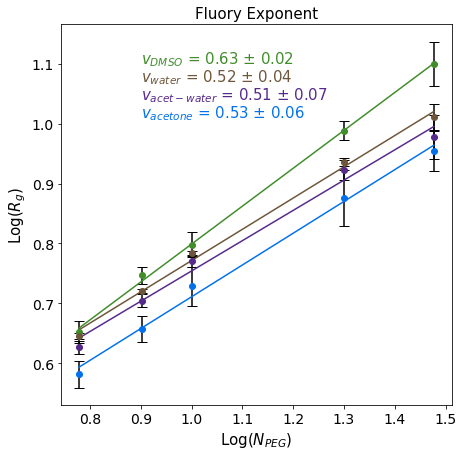

In [59]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_peg), np.log10(rgace_npavg), yerr=rgace_std, color='#0371EC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(np.log10(n_peg), np.log10(rgdmso_npavg), yerr=rgdmso_std, color='#418D2B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(np.log10(n_peg), np.log10(rgawmix_npavg), yerr=rgawmix_std, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(np.log10(n_peg), np.log10(rgwat_npavg), yerr=rgwat_std, color='#6E563A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

plt.plot(np.log10(n_peg), gg_ace, color='#0371EC')
plt.plot(np.log10(n_peg), gg_dmso, color='#418D2B')
plt.plot(np.log10(n_peg), gg_aw, color='#562A8B')
plt.plot(np.log10(n_peg), gg, color='#6E563A')

plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PEG}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(0.9, 1.01, r'$v_{acetone}$ = 0.53 ± 0.06', fontsize=15, color='#0371EC')
plt.text(0.9, 1.1, r'$v_{DMSO}$ = 0.63 ± 0.02', fontsize=15, color='#418D2B')
plt.text(0.9, 1.04, r'$v_{acet-water}$ = 0.51 ± 0.07', fontsize=15, color='#562A8B')
plt.text(0.9, 1.07, r'$v_{water}$ = 0.52 ± 0.04', fontsize=15, color='#6E563A')


### Rg vs time in different sol per monomer length

### N = 6

In [60]:
rg_awmixn6 = np.load('peg_awmix/n6peg_awmixRg.npy')
rg_acen6 = np.load('peg_acetone/n6peg_aceRg.npy')
rg_dmson6 = np.load('peg_dmso/n6peg_dmsoRg.npy')
rg_watn6 = np.load('tout_pegwater/n6peg_watRg.npy')

In [61]:
trj_len = np.arange(18000)
trj_len

array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 1)

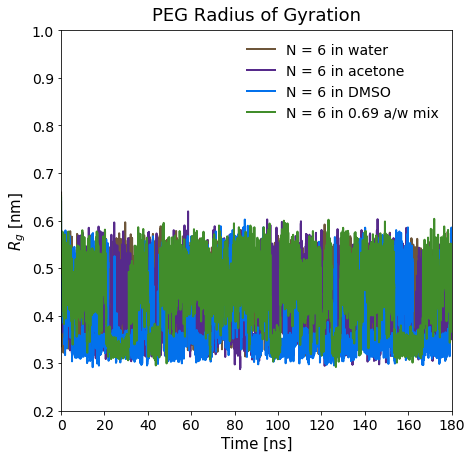

In [62]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rg_watn6/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rg_awmixn6/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rg_acen6/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rg_dmson6/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 6 in acetone','N = 6 in DMSO','N = 6 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,1)

## N = 8

In [63]:
rg_awmixn8 = np.load('peg_awmix/n8peg_awmixRg.npy')
rg_acen8 = np.load('peg_acetone/n8peg_aceRg.npy')
rg_dmson8 = np.load('peg_dmso/n8peg_dmsoRg.npy')
rg_watn8 = np.load('tout_pegwater/n8peg_watRg.npy')

(0.2, 1)

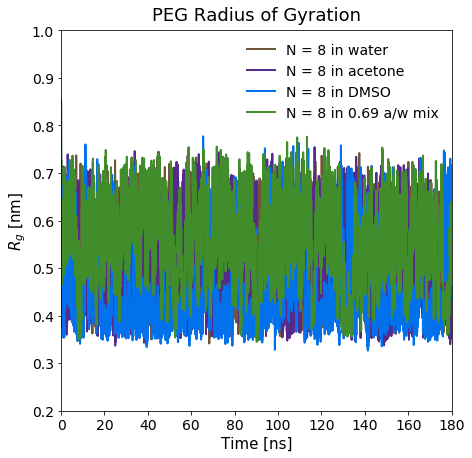

In [64]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rg_watn8/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rg_awmixn8/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rg_acen8/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rg_dmson8/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 8 in water','N = 8 in acetone','N = 8 in DMSO','N = 8 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,1)

## N = 10

In [65]:
rg_awmixn10 = np.load('peg_awmix/n10peg_awmixRg.npy')
rg_acen10 = np.load('peg_acetone/n10peg_aceRg.npy')
rg_dmson10 = np.load('peg_dmso/n10peg_dmsoRg.npy')
rg_watn10 = np.load('tout_pegwater/n10peg_watRg.npy')

(0.2, 1.5)

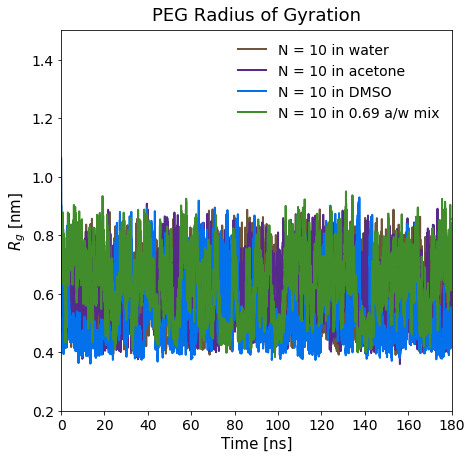

In [66]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rg_watn10/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rg_awmixn10/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rg_acen10/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rg_dmson10/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 10 in water','N = 10 in acetone','N = 10 in DMSO','N = 10 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,1.5)

## N = 20 

In [67]:
rg_awmixn20 = np.load('peg_awmix/n20peg_awmixRg.npy')
rg_acen20 = np.load('peg_acetone/n20peg_aceRg.npy')
rg_dmson20 = np.load('peg_dmso/n20peg_dmsoRg.npy')
rg_watn20 = np.load('tout_pegwater/n20peg_watRg.npy')

(0.2, 2)

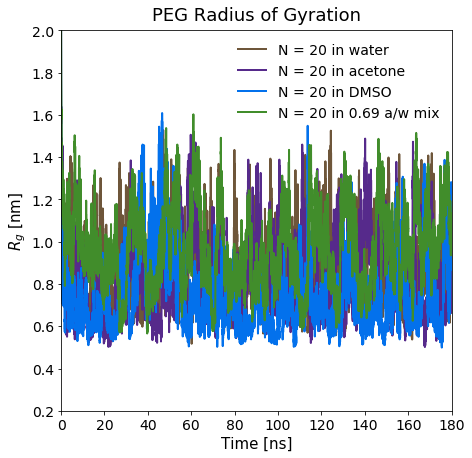

In [68]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rg_watn20/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rg_awmixn20/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rg_acen20/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rg_dmson20/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 20 in water','N = 20 in acetone','N = 20 in DMSO','N = 20 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

## N = 30

In [69]:
rg_awmixn30= np.load('peg_awmix/n30peg_awmixRg.npy')
rg_acen30 = np.load('peg_acetone/n30peg_aceRg.npy')
rg_dmson30 = np.load('peg_dmso/n30peg_dmsoRg.npy')
rg_watn30 = np.load('tout_pegwater/n30peg_watRg.npy')

(0.2, 3)

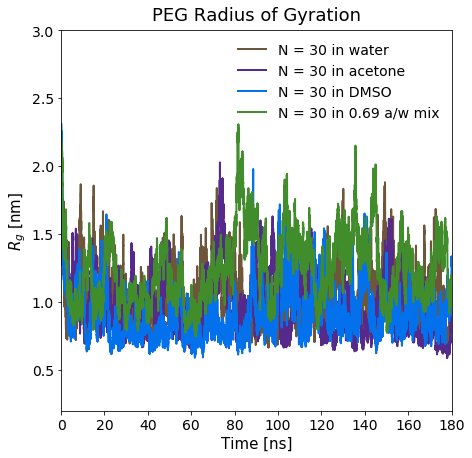

In [70]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rg_watn30/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rg_awmixn30/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rg_acen30/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rg_dmson30/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 30 in water','N = 30 in acetone','N = 30 in DMSO','N = 30 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)